# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/dianaxnav/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

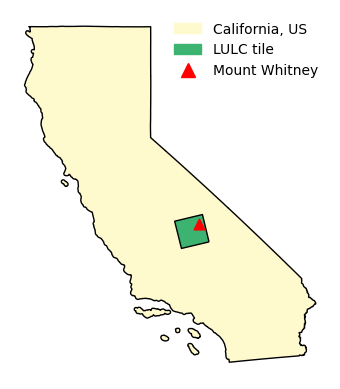

In [1]:
### ===== FINAL CODE =====

# import libraries and functions here
import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

from shapely import Point
import matplotlib.pyplot as plt
import pandas as pd
from shapely import box
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


# import the raster file and store it as lulc 
# load NIR tif file
lulc1 = os.path.join(os.getcwd(),'data','land_cover.tif')
lulc = rioxr.open_rasterio(lulc1)

#import file from link and read using gpd
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

# use the box method to creating bounding box from ca data 
lulc_box = box(*lulc.rio.bounds())

# create geo-dataframe from bounding box
bbox = gpd.GeoDataFrame(geometry = [lulc_box], # assign geometry column
                           crs = lulc.rio.crs) # assign CRS

# mt whitney points and store it as coords
mount_whitney_coords = (-13168238.600765156, 4380516.844251228)

#my whitney convert to geodataframe 
mt_whitney = gpd.GeoDataFrame(geometry=[Point(mount_whitney_coords)],
                             crs = 3857)

#now lets switch bbox crs to match ca & mt_whitney
bbox.to_crs(crs=3857, inplace = True)

# plot mt whitney within bbox in CA 
fig, ax = plt.subplots()

#plot each figure with eachother 
ca.plot(ax=ax, color = 'lemonchiffon', edgecolor='black', label='Californa, US', linestyle='None')
bbox.plot(ax = ax, color = 'mediumseagreen', label='LULC tile', linestyle='None', edgecolor='black')
mt_whitney.plot(ax=ax, color='red', marker='^', label = 'Mount Whitney', markersize = 60)

#assign each label for the legend 
a_patch = mpatches.Patch(color='lemonchiffon', label='California, US') #match the colors with the ones in plot and label 
b_patch = mpatches.Patch(color='mediumseagreen', label='LULC tile')
c_patch = mlines.Line2D([],[], color='red', marker='^', label='Mount Whitney', linestyle = 'None', markersize = 10) #customize this one 
#to add the triangle shape 

#call each one using handles and remove the frame
plt.legend(handles=[a_patch, b_patch, c_patch], frameon=False)

#remove the axis to match plot shown 
plt.axis('off')

#show the plot 
plt.show()

## Import libraries and functions

In [2]:
# import libraries and functions here
import os
import numpy as np

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

from shapely import Point
import matplotlib.pyplot as plt
import pandas as pd

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [3]:
# 1 
# display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# import the raster file and store it as lulc 
# load NIR tif file
lulc1 = os.path.join(os.getcwd(),'data','land_cover.tif')
lulc = rioxr.open_rasterio(lulc1)

#call the data to take a look at it 
lulc

<xarray.DataArray (band: 1, y: 3000, x: 3000)>
[9000000 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [4]:
# 2
#import the file using geopandas read file function
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')


## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

<class 'geopandas.geodataframe.GeoDataFrame'>


<AxesSubplot:>

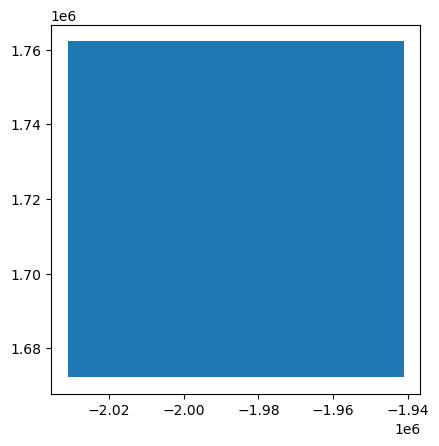

In [5]:
# create geopandas data frame w bbox 
from shapely import box

# use the box method to creating bounding box from ca data 
lulc_box = box(*lulc.rio.bounds())

lulc_box


# create geo-dataframe from bounding box
bbox = gpd.GeoDataFrame(geometry = [lulc_box], # assign geometry column
                           crs = lulc.rio.crs) # assign CRS

#print out the bbox type
print(type(bbox))
bbox

#Plot it to make sure its the correct bounds 
bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

<AxesSubplot:>

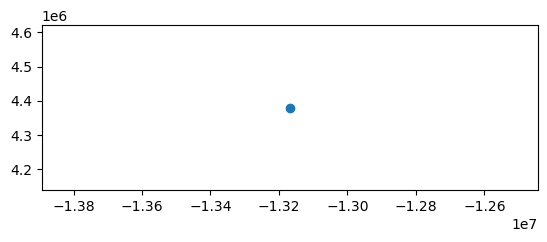

In [6]:
# mt whitney points and store it as coords
mount_whitney_coords = (-13168238.600765156, 4380516.844251228)

#my whitney convert to geodataframe 
mt_whitney = gpd.GeoDataFrame(geometry=[Point(mount_whitney_coords)],
                             crs = 3857)
#Plot to check the point
mt_whitney.plot()

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [7]:
# lets check if they are the same crs
print(bbox.crs == ca.crs)
print(bbox.crs == mt_whitney.crs)

#now lets switch bbox crs to match ca & mt_whitney
bbox.to_crs(crs=3857, inplace = True)

#check the crs to make sure it worked
print(bbox.crs == mt_whitney.crs)

False
False
True


## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

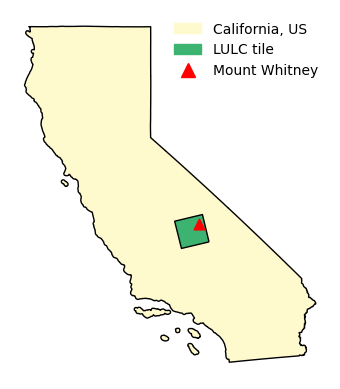

In [8]:
#import a few more libraries 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# plot mt whitney within bbox in CA 
fig, ax = plt.subplots()

#plot each figure with eachother 
ca.plot(ax=ax, color = 'lemonchiffon', edgecolor='black', label='Californa, US', linestyle='None')#customize color and edge for each one
bbox.plot(ax = ax, color = 'mediumseagreen', label='LULC tile', linestyle='None', edgecolor='black')
mt_whitney.plot(ax=ax, color='red', marker='^', label = 'Mount Whitney', markersize = 60)#adjust markersize in plot so it shows bigger
#to one in the sample map

#assign each label for the legend 
a_patch = mpatches.Patch(color='lemonchiffon', label='California, US') #match the colors with the ones in plot and label 
b_patch = mpatches.Patch(color='mediumseagreen', label='LULC tile')
c_patch = mlines.Line2D([],[], color='red', marker='^', label='Mount Whitney', linestyle = 'None', markersize = 10) #customize this one 
#to add the triangle shape 

#call each one using handles and remove the frame
plt.legend(handles=[a_patch, b_patch, c_patch], frameon=False)

#remove the axis to match plot shown 
plt.axis('off')

#show the plot 
plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
